# Tutorial: Fourier series

In [23]:
# Imports related to plotting and LaTeX
import matplotlib.pyplot as plt
from IPython.display import display, Math
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
def show(arg):
    return display(Math(arg.to_latex()))

In [24]:
# Imports related to mathematics
import numpy as np
from abelian import LCA, Homomorphism, Function
from sympy import Rational, pi

## Fourier series for $f(x) = x$ defined on $T$

In this example we compute the Fourier series coefficients for
$f(x) = x$ with domain $T = \mathbb{R}/\mathbb{Z}$ using `abelian`. 

We start by defining the function on the domain.

In [25]:
def identity(arg_list):
    x = arg_list[0] # First element of vector/list
    return x

# Create the domain T and a function on it
T = LCA(periods = [1], discrete = [False])
function = Function(identity, T)
show(function)

<IPython.core.display.Math object>

Then we create a monomorphism $\phi_\text{sample}$ to sample the function.

We make use for the `Rational` class to avoid numerical errors.

In [26]:
# Set up the number of sample points
n = 32

# Create the source of the monomorphism
Z_n = LCA([n]) 
phi_sample = Homomorphism([Rational(1, n)], source = Z_n, target = T)
show(phi_sample)

<IPython.core.display.Math object>

Sample the function, take DFT, and use a transversal rule and along with $\widehat{\phi}_\text{sample}$ to push the function to $\widehat{T} = \mathbb{Z}$.

In [27]:
# Pullback along phi_sample
function_sampled = function.pullback(phi_sample)

# Take the DFT
function_sampled_dual = function_sampled.dft()

# Set up a transversal rule
def transversal_rule(arg_list):
    x = arg_list[0] # First element of vector/list
    if x < n/2:
        return [x]
    else:
        return [x - n]

# Calculate the Fourier series coefficients - the function on Z
coeffs = function_sampled_dual.transversal(phi_sample.dual(), transversal_rule)
show(coeffs)

<IPython.core.display.Math object>

Let us compare with the analytical solution, which is

$$c_k = 
  \begin{cases} 
   1/2 & \text{if } x = 0 \\
   i / 2 \pi k   & \text{else}.
  \end{cases}$$

In [28]:
# Set up a function for the analytical solution
def analytical(k):
    if k == 0:
        return 1/2
    else:
        return complex(0, 1)/(2*pi*k)

# Sample the analytical and computed functions
sample_values = list(range(-n, n+1))
analytical_sampled = list(map(analytical, sample_values))
computed_samled = coeffs.sample(sample_values)

And create a plot. Notice how the computed values drop to zero outside of the transversal region.

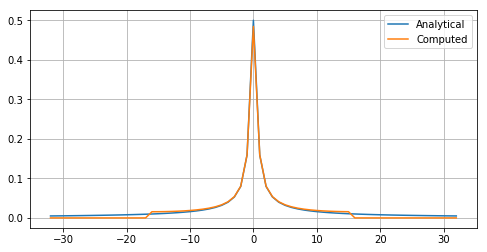

In [29]:
# Convert to absolute values
length = lambda x: float(abs(x))
analytical_sampled_length = list(map(length, analytical_sampled))
computed_samled_length = list(map(length, computed_samled))

# Plot it
plt.figure(figsize = (8,4))
plt.plot(sample_values, analytical_sampled_length, label = 'Analytical')
plt.plot(sample_values, computed_samled_length, label = 'Computed')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Image subsampling

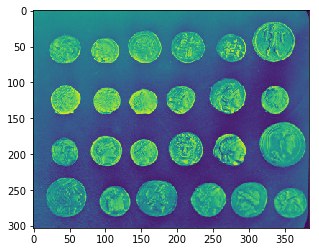

In [8]:
from skimage import data, img_as_float

# Import an image
image = img_as_float(data.coins())
plt.imshow(image)
plt.show()

In [9]:
image.shape

(303, 384)

In [10]:
domain = LCA(list(image.shape))
function = Function(image.tolist(), domain)

In [11]:
phi_sample = Homomorphism([[3, 0], [0, 3]], target = domain)
phi_sample = phi_sample.project_to_source()
show(phi_sample)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

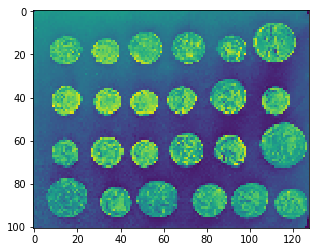

In [12]:
sampled = function.pullback(phi_sample)
show(sampled)
table = sampled.to_table()
plt.imshow(np.abs(table))
plt.show()

In [13]:
phi_sample = Homomorphism([1, 128], target = domain)
phi_sample = phi_sample.image().project_to_source().project_to_target()
show(phi_sample)

print('Sampled density:', (phi_sample.source.periods[0])/ (303*384))

<IPython.core.display.Math object>

Sampled density: 1/384


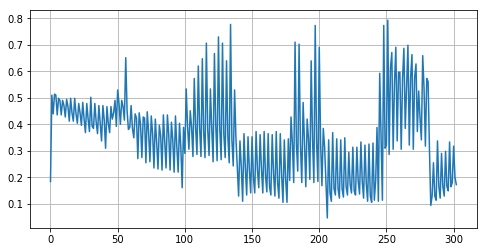

In [15]:
sampled_function = function.pullback(phi_sample)
sampled_data = sampled_function.to_table()
plt.figure(figsize = (8, 4))
plt.plot(np.abs(sampled_data))
plt.grid(True)
plt.show()